In [1]:
import matplotlib
matplotlib.use("Qt5Agg")

%matplotlib inline

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy
#from vnpy.trader.app.ctaStrategy.strategy.strategyMultiTimeframe import MultiTimeframeStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyMultiSignal import MultiSignalStrategy

In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# Disabled
# 使用历史数据缓存服务器，请先运行startHds.py
#print u'使用历史数据缓存服务器，请先运行startHds.py'
#engine.initHdsClient()                        # 受限于机器内存，超出上限会报错

In [4]:
# 设置回测使用的数据                       
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF0000')  # 设置使用的历史数据库
engine.setStartDate('20150101')               # 设置回测用的数据起始日期

In [5]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(1000000)  # 设置回测本金

In [6]:
# 在引擎中创建策略对象
d = {'atrLength': 11}                     # 策略参数配置
engine.initStrategy(AtrRsiStrategy, d)    # 创建策略对象
#ngine.initStrategy(MultiTimeframeStrategy, d)    
#engine.initStrategy(MultiSignalStrategy, {})    

In [7]:
# 运行回测
engine.runBacktesting()          # 运行回测

2019-01-10 23:32:51.345000	开始载入数据
2019-01-10 23:32:51.579000	载入完成，数据量：155070
2019-01-10 23:32:51.579000	开始回测
2019-01-10 23:32:51.626000	策略初始化完成
2019-01-10 23:32:51.626000	策略启动完成
2019-01-10 23:32:51.626000	开始回放数据
2019-01-10 23:33:03.086000	数据回放结束


2019-01-10 23:33:03.109000	计算按日统计结果
2019-01-10 23:33:03.134000	------------------------------
2019-01-10 23:33:03.134000	首个交易日：	2015-01-12
2019-01-10 23:33:03.134000	最后交易日：	2017-07-14
2019-01-10 23:33:03.134000	总交易日：	612
2019-01-10 23:33:03.134000	盈利交易日	297
2019-01-10 23:33:03.134000	亏损交易日：	315
2019-01-10 23:33:03.135000	起始资金：	1000000
2019-01-10 23:33:03.135000	结束资金：	1,133,650.64
2019-01-10 23:33:03.135000	总收益率：	13.37%
2019-01-10 23:33:03.135000	年化收益：	8.5%
2019-01-10 23:33:03.135000	总盈亏：	133,650.64
2019-01-10 23:33:03.135000	最大回撤: 	-185,949.45
2019-01-10 23:33:03.135000	百分比最大回撤: -16.31%
2019-01-10 23:33:03.135000	总手续费：	148,769.36
2019-01-10 23:33:03.135000	总滑点：	267,420.0
2019-01-10 23:33:03.135000	总成交金额：	4,958,978,520.0
2019-01-10 23:33:03.136000	总成交笔数：	4,457.0
2019-01-10 23:33:03.136000	日均盈亏：	218.38
2019-01-10 23:33:03.136000	日均手续费：	243.09
2019-01-10 23:33:03.136000	日均滑点：	436.96
2019-01-10 23:33:03.136000	日均成交金额：	8,102,906.08
2019-01-10 23:33:03.136000	日均成交笔数：	7.28
2019-01-10 23:33:03

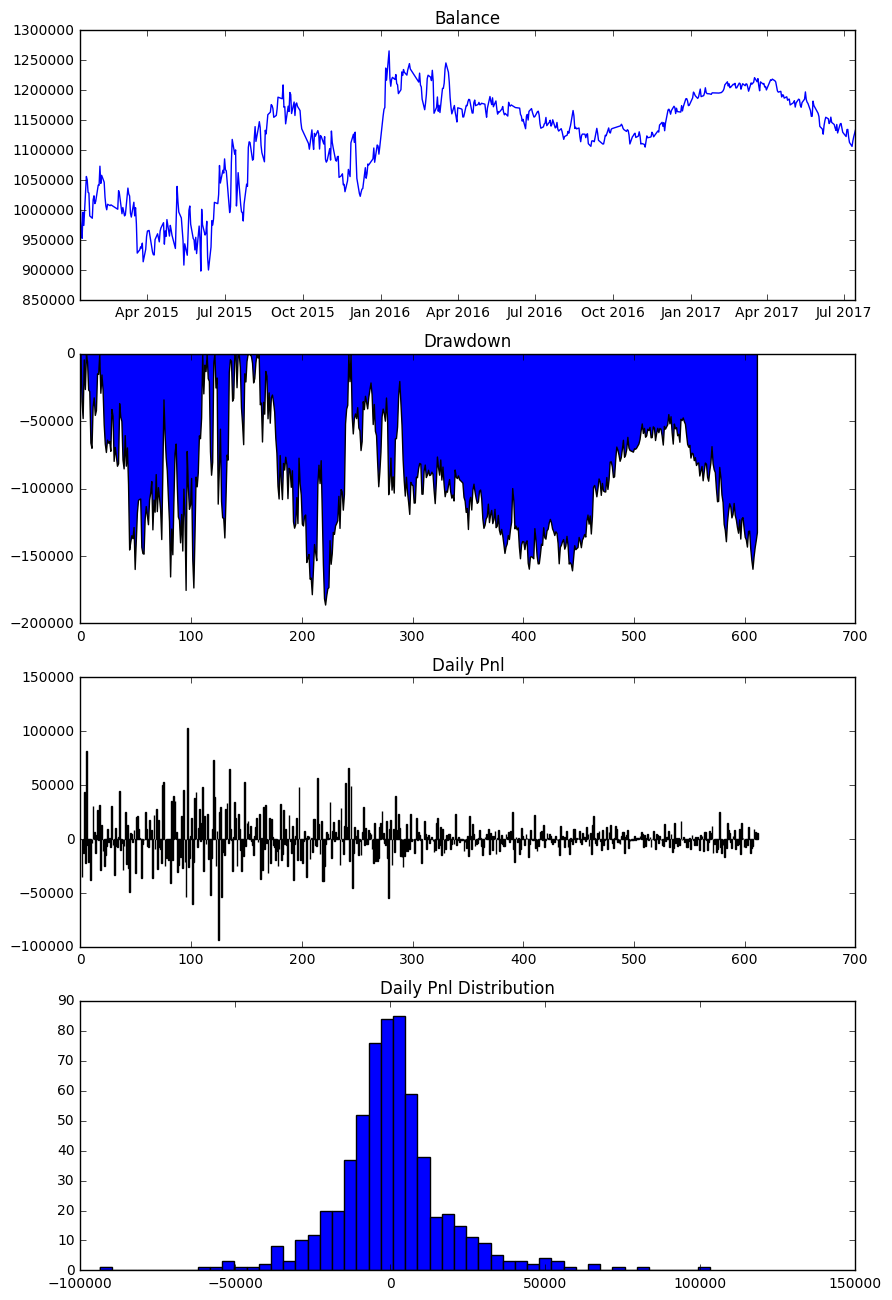

In [8]:
# 显示逐日回测结果
engine.showDailyResult()

2019-01-10 23:33:05.496000	计算回测结果
2019-01-10 23:33:05.585000	------------------------------
2019-01-10 23:33:05.585000	第一笔交易：	2015-01-12 09:27:00
2019-01-10 23:33:05.586000	最后一笔交易：	2017-07-14 15:00:00
2019-01-10 23:33:05.586000	总交易次数：	2,229.0
2019-01-10 23:33:05.586000	总盈亏：	133,557.36
2019-01-10 23:33:05.586000	最大回撤: 	-215,542.46
2019-01-10 23:33:05.586000	平均每笔盈利：	59.92
2019-01-10 23:33:05.586000	平均每笔滑点：	120.0
2019-01-10 23:33:05.587000	平均每笔佣金：	66.76
2019-01-10 23:33:05.587000	胜率		37.1%
2019-01-10 23:33:05.587000	盈利交易平均值	9,721.27
2019-01-10 23:33:05.587000	亏损交易平均值	-5,639.04
2019-01-10 23:33:05.587000	盈亏比：	1.72


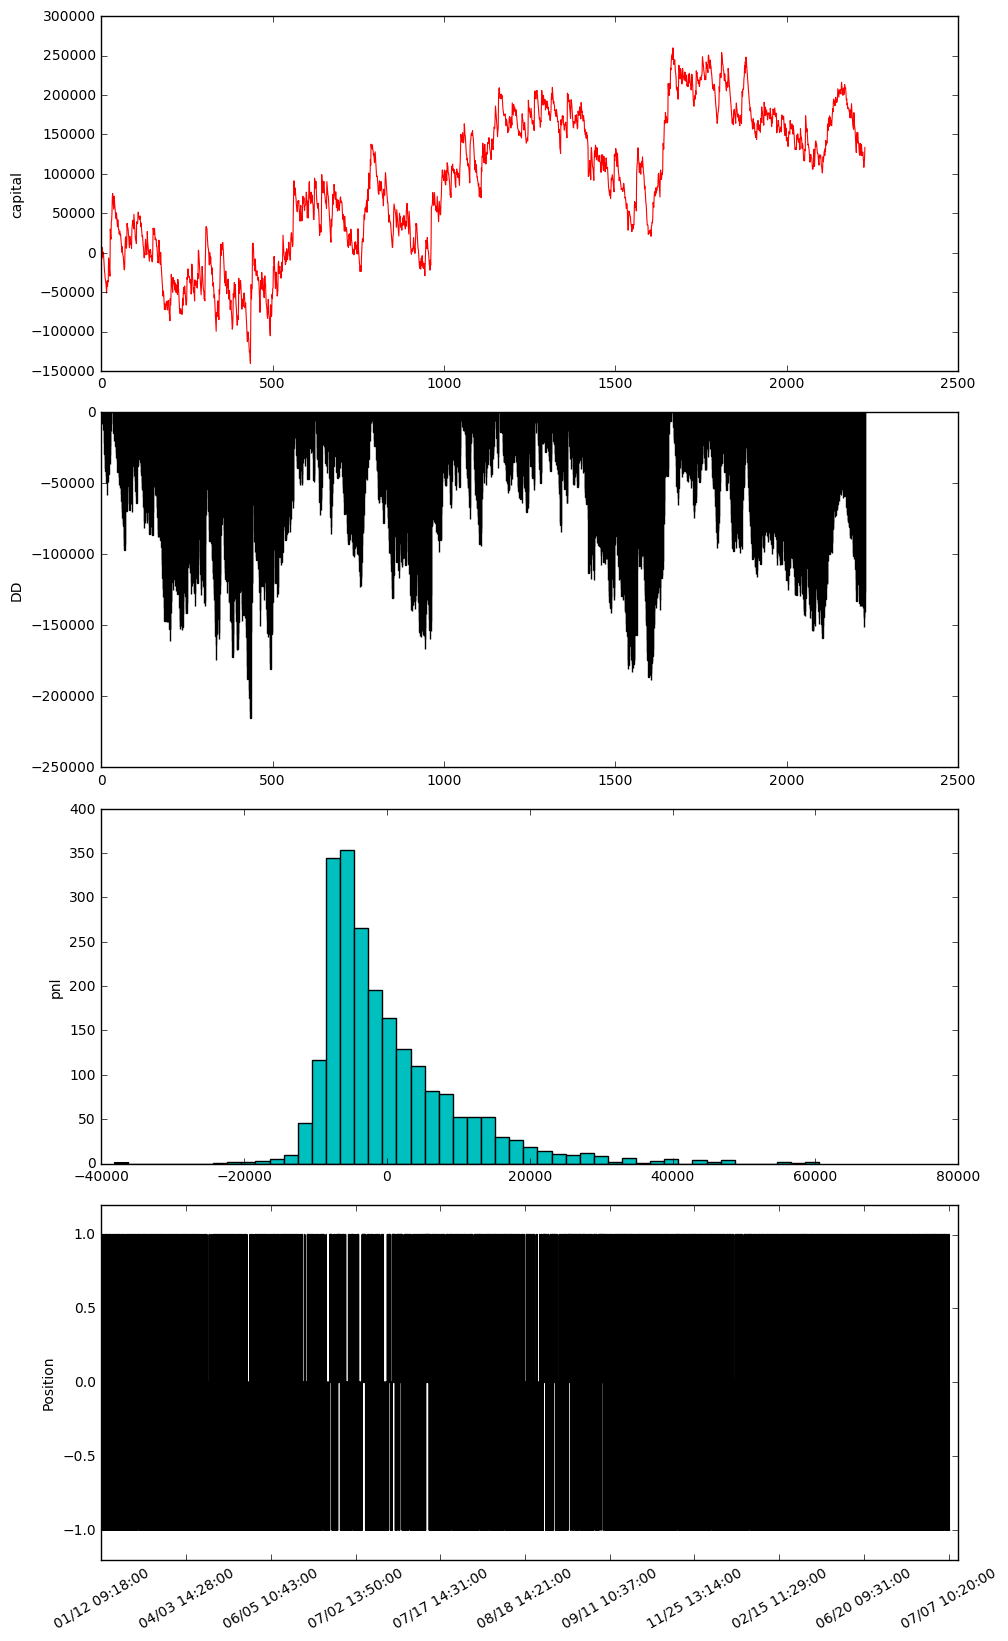

In [9]:
# 显示逐笔回测结果
engine.showBacktestingResult()

In [10]:
# 显示前10条成交记录
for i in range(10):
    d = engine.tradeDict[str(i+1)].__dict__
    print 'TradeID: %s, Time: %s, Direction: %s, Price: %s, Volume: %s' %(d['tradeID'], d['dt'], d['direction'], d['price'], d['volume'])

TradeID: 1, Time: 2015-01-12 09:18:00, Direction: 多, Price: 3550.0, Volume: 1
TradeID: 2, Time: 2015-01-12 09:27:00, Direction: 空, Price: 3529.8, Volume: 1
TradeID: 3, Time: 2015-01-12 09:35:00, Direction: 多, Price: 3540.8, Volume: 1
TradeID: 4, Time: 2015-01-12 10:02:00, Direction: 空, Price: 3536.2, Volume: 1
TradeID: 5, Time: 2015-01-12 10:03:00, Direction: 空, Price: 3541.4, Volume: 1
TradeID: 6, Time: 2015-01-12 13:34:00, Direction: 多, Price: 3492.2, Volume: 1
TradeID: 7, Time: 2015-01-12 13:35:00, Direction: 多, Price: 3491.6, Volume: 1
TradeID: 8, Time: 2015-01-12 14:14:00, Direction: 空, Price: 3478.8, Volume: 1
TradeID: 9, Time: 2015-01-12 14:15:00, Direction: 空, Price: 3470.2, Volume: 1
TradeID: 10, Time: 2015-01-12 14:19:00, Direction: 多, Price: 3496.8, Volume: 1


In [11]:
# 优化配置
setting = OptimizationSetting()                 # 新建一个优化任务设置对象
setting.setOptimizeTarget('totalNetPnl')        # 设置优化排序的目标是策略净盈利
setting.addParameter('atrLength', 12, 16, 2)    # 增加第一个优化参数atrLength，起始12，结束20，步进2
#setting.addParameter('atrMa', 20, 30, 5)        # 增加第二个优化参数atrMa，起始20，结束30，步进5
#setting.addParameter('rsiLength', 5)            # 增加一个固定数值的参数

# 执行多进程优化
import time
start = time.time()
#resultList = engine.runParallelOptimization(AtrRsiStrategy, setting)
resultList = engine.runOptimization(AtrRsiStrategy, setting)
print u'耗时：%s' %(time.time()-start)

2019-01-10 23:33:12.433000	------------------------------
2019-01-10 23:33:12.433000	setting: {'atrLength': 12}
2019-01-10 23:33:12.435000	开始载入数据
2019-01-10 23:33:12.532000	载入完成，数据量：155070
2019-01-10 23:33:12.532000	开始回测
2019-01-10 23:33:12.576000	策略初始化完成
2019-01-10 23:33:12.577000	策略启动完成
2019-01-10 23:33:12.577000	开始回放数据
2019-01-10 23:33:25.583000	数据回放结束
2019-01-10 23:33:25.583000	计算按日统计结果
2019-01-10 23:33:25.679000	------------------------------
2019-01-10 23:33:25.679000	setting: {'atrLength': 14}
2019-01-10 23:33:25.682000	开始载入数据
2019-01-10 23:33:25.792000	载入完成，数据量：155070
2019-01-10 23:33:25.793000	开始回测
2019-01-10 23:33:25.844000	策略初始化完成
2019-01-10 23:33:25.845000	策略启动完成
2019-01-10 23:33:25.845000	开始回放数据
2019-01-10 23:33:38.301000	数据回放结束
2019-01-10 23:33:38.301000	计算按日统计结果
2019-01-10 23:33:38.393000	------------------------------
2019-01-10 23:33:38.393000	setting: {'atrLength': 16}
2019-01-10 23:33:38.395000	开始载入数据
2019-01-10 23:33:38.485000	载入完成，数据量：155070
2019-01-10 23:33:38.485

In [12]:
# 显示优化的所有统计数据
for result in resultList:
    print '-' * 30
    print u'参数：%s，目标：%s' %(result[0], result[1])
    print u'统计数据：'
    for k, v in result[2].items():
        print u'%s：%s' %(k, v)

------------------------------
参数：["{'atrLength': 16}"]，目标：241380.4386
统计数据：
startDate：2015-01-12
endBalance：1241380.4386
endDate：2017-07-14
maxDdPercent：-14.9245960606
annualizedReturn：11.5948634179
returnStd：1.61942724303
dailyReturn：0.0483119309079
maxDrawdown：-212996.1012
totalTurnover：4905985380.0
profitDays：299
sharpeRatio：0.462166620043
dailyTurnover：8016315.98039
totalTradeCount：4413
totalSlippage：264780.0
dailyNetPnl：394.412481373
dailyTradeCount：7.21078431373
totalNetPnl：241380.4386
totalDays：612
lossDays：313
dailySlippage：432.647058824
dailyCommission：240.489479412
totalReturn：24.13804386
totalCommission：147179.5614
------------------------------
参数：["{'atrLength': 14}"]，目标：179029.9176
统计数据：
startDate：2015-01-12
endBalance：1179029.9176
endDate：2017-07-14
maxDdPercent：-14.7903454912
annualizedReturn：9.80904850183
returnStd：1.67616358043
dailyReturn：0.0408710354243
maxDrawdown：-179899.9344
totalTurnover：4930336080.0
profitDays：301
sharpeRatio：0.377750337469
dailyTurnover：80561